Business question: How have salaries changed over time between different groups of people in San Francisco?

The data contains the names, job title, and compensation for SF city employees on an annual basis from 2011 to 2014. 


Hypothesis 1: people’s pay has increased overtime for all job titles. 

Hypothesis 2: for the top 5 job titles, totalpay has increased overtime

I will be using looking at base pay, overtime pay, other pay and total pay to conduct the analysis. 
All the data is continuous data. 

The proposal will be beneficial to users such as company hiring managers trying to figure out pay scale within the company. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Thinkful/Capstone 3/archive/Salaries.csv'
import pandas as pd
from scipy import stats
import seaborn as sns
df = pd.read_csv(data_path, na_values = 'Not Provided')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#find number of column and row
df.shape

(148654, 13)

In [ ]:
#basic stats
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [ ]:
#looking at table
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [ ]:
#information of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148652 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


Data Cleaning

In [ ]:
#check if there is any nulls
df.isnull()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,False,False,False,False,False,False,True,False,False,False,True,False,True
1,False,False,False,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,False,False,False,False,False,False,False,False,False,False,True,False,False
148650,False,False,False,True,True,True,True,False,False,False,True,False,True
148651,False,False,False,True,True,True,True,False,False,False,True,False,True
148652,False,False,False,True,True,True,True,False,False,False,True,False,True


In [ ]:
#clean nulls
df = df[df['BasePay'].notna()]
df = df[df['OvertimePay'].notna()]
df = df[df['OtherPay'].notna()]
df = df[df['TotalPay'].notna()]
df = df[df['TotalPayBenefits'].notna()]
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT


In [ ]:
df['Agency'].nunique()

1

In [ ]:
df['Status'].unique()

array([nan, 'PT', 'FT'], dtype=object)

In [ ]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [ ]:
df['JobTitle'].value_counts()

Transit Operator                                      6975
Special Nurse                                         4382
Registered Nurse                                      3725
Public Svc Aide-Public Works                          2514
Police Officer 3                                      2411
                                                      ... 
ZOO CURATOR                                              1
FORENSIC TOXICOLOGIST                                    1
Auto Body&Fender Wrk Asst Sprv                           1
HUMAN RESOURCES DIRECTOR                                 1
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI       1
Name: JobTitle, Length: 2154, dtype: int64

In [ ]:
df['JobTitle'].nunique()

2154

Splitting data into different years

In [ ]:
df_2011 = df.iloc[(df['Year'] == 2011).values]
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36159 entries, 0 to 36158
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                36159 non-null  int64  
 1   EmployeeName      36158 non-null  object 
 2   JobTitle          36159 non-null  object 
 3   BasePay           36159 non-null  float64
 4   OvertimePay       36159 non-null  float64
 5   OtherPay          36159 non-null  float64
 6   Benefits          0 non-null      float64
 7   TotalPay          36159 non-null  float64
 8   TotalPayBenefits  36159 non-null  float64
 9   Year              36159 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            36159 non-null  object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 3.9+ MB


In [ ]:
df_2012 = df.iloc[(df['Year'] == 2012).values]
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36766 entries, 36159 to 72924
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                36766 non-null  int64  
 1   EmployeeName      36765 non-null  object 
 2   JobTitle          36766 non-null  object 
 3   BasePay           36766 non-null  float64
 4   OvertimePay       36766 non-null  float64
 5   OtherPay          36766 non-null  float64
 6   Benefits          36766 non-null  float64
 7   TotalPay          36766 non-null  float64
 8   TotalPayBenefits  36766 non-null  float64
 9   Year              36766 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            36766 non-null  object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 3.9+ MB


In [ ]:
df_2013 = df.iloc[(df['Year'] == 2013).values]
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37001 entries, 72925 to 110520
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                37001 non-null  int64  
 1   EmployeeName      37001 non-null  object 
 2   JobTitle          37001 non-null  object 
 3   BasePay           37001 non-null  float64
 4   OvertimePay       37001 non-null  float64
 5   OtherPay          37001 non-null  float64
 6   Benefits          37001 non-null  float64
 7   TotalPay          37001 non-null  float64
 8   TotalPayBenefits  37001 non-null  float64
 9   Year              37001 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            37001 non-null  object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
df_2014 = df.iloc[(df['Year'] == 2014).values]
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38119 entries, 110531 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  float64
 4   OvertimePay       38119 non-null  float64
 5   OtherPay          38119 non-null  float64
 6   Benefits          38119 non-null  float64
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            38119 non-null  object 
 12  Status            38119 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 4.1+ MB


Data Visualization

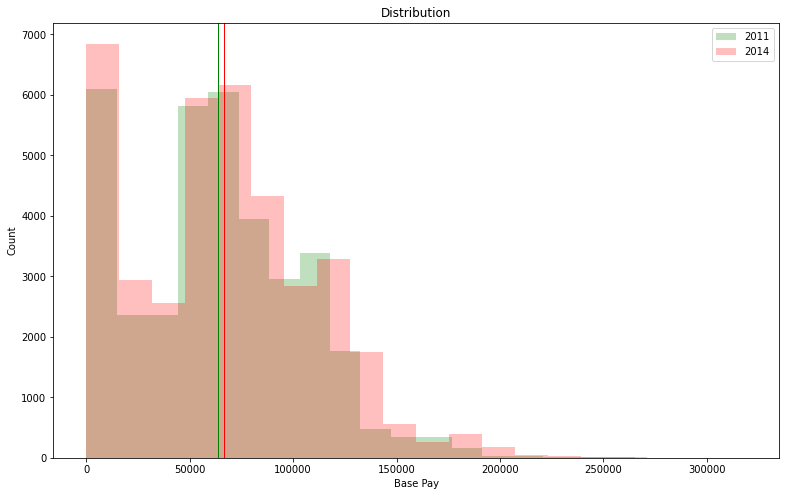

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,8))

plt.title('Distribution')
plt.xlabel('Base Pay')
plt.ylabel('Count')

plt.hist(df_2011['BasePay'], bins=20, alpha=0.25, label='2011', color='g')
# plt.hist(df_2012['BasePay'], bins=20, alpha=0.25, label='2011', color='y')
# plt.hist(df_2013['BasePay'], bins=20, alpha=0.25, label='2011', color='b')
plt.hist(df_2014['BasePay'], bins=20, alpha=0.25, label='2014', color='r')

plt.axvline(df_2011['BasePay'].mean(), color='g', linewidth=1)
# plt.axvline(df_2012['BasePay'].mean(), color='y', linewidth=1)
# plt.axvline(df_2013['BasePay'].mean(), color='b', linewidth=1)
plt.axvline(df_2014['BasePay'].mean(), color='r', linewidth=1)

plt.legend(loc='upper right')
plt.show()


The graph above shows the distribution and mean of basepay. It is a bar graph. The green represent 2011 and the red represent 2014. It shows that the basepay has increased overtime. 

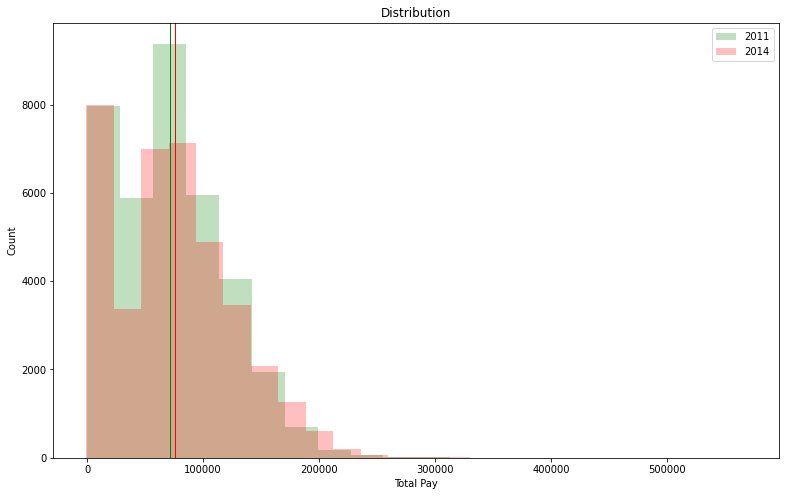

In [ ]:
plt.figure(figsize=(13,8))

plt.title('Distribution')
plt.xlabel('Total Pay')
plt.ylabel('Count')

plt.hist(df_2011['TotalPay'], bins=20, alpha=0.25, label='2011', color='g')
plt.hist(df_2014['TotalPay'], bins=20, alpha=0.25, label='2014', color='r')


plt.axvline(df_2011['TotalPay'].mean(), color='g', linewidth=1)
plt.axvline(df_2014['TotalPay'].mean(), color='r', linewidth=1)

plt.legend(loc='upper right')
plt.show()

The graph above shows the distribution and mean of total pay. It is a bar graph. The green represent 2011 and the red represent 2014. It shows that the basepay has increased overtime.

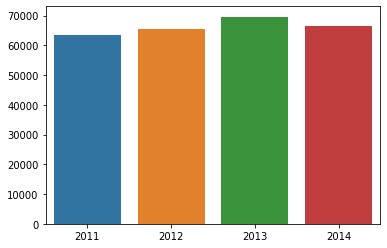

In [ ]:
sns.barplot(y=[df_2011['BasePay'].mean(),
               df_2012['BasePay'].mean(),
               df_2013['BasePay'].mean(),
               df_2014['BasePay'].mean()],
            x=[2011,2012,2013,2014])

plt.show()

This graph shows the mean of base pay for 2011 through 2014. We can see that from 2011 to 2013 the mean increase steadily but from 2013 to 2014 there is a slight decrease.

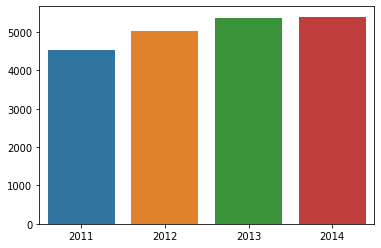

In [ ]:
sns.barplot(y=[df_2011['OvertimePay'].mean(),
               df_2012['OvertimePay'].mean(),
               df_2013['OvertimePay'].mean(),
               df_2014['OvertimePay'].mean()],
            x=[2011,2012,2013,2014])

plt.show()

This graph shows the mean of overtime pay for 2011 through 2014. We can see that from 2011 to 2013 the mean increase steadily but the increase from 2013 to 2014 is very minimal.

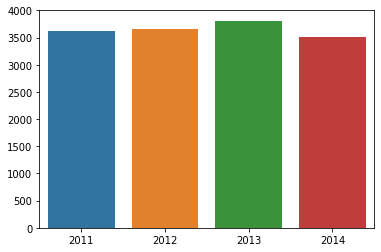

In [ ]:
sns.barplot(y=[df_2011['OtherPay'].mean(),
               df_2012['OtherPay'].mean(),
               df_2013['OtherPay'].mean(),
               df_2014['OtherPay'].mean()],
            x=[2011,2012,2013,2014])

plt.show()

This graph shows the mean of other pay for 2011 through 2014. We can see that from 2011 to 2013 the mean increase steadily but from 2013 to 2014 there is a slight decrease.

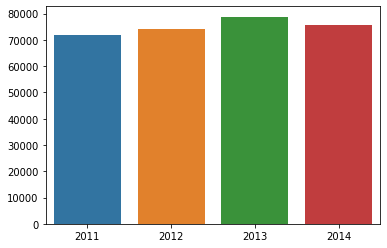

In [ ]:
sns.barplot(y=[df_2011['TotalPay'].mean(),
               df_2012['TotalPay'].mean(),
               df_2013['TotalPay'].mean(),
               df_2014['TotalPay'].mean()],
            x=[2011,2012,2013,2014])

plt.show()

This graph shows the mean of total pay for 2011 through 2014. We can see that from 2011 to 2013 the mean increase steadily but from 2013 to 2014 there is a slight decrease.

Hypothesis testing: 

Hypothesis 1: people’s pay has increased overtime for all job titles. 


In [ ]:
stats.ttest_ind(df_2011['BasePay'],df_2014['BasePay'])

Ttest_indResult(statistic=-9.539889046671979, pvalue=1.4711370972099165e-21)

In [ ]:
df_2011['BasePay'].unique

<bound method Series.unique of 0        167411.18
1        155966.02
2        212739.13
3         77916.00
4        134401.60
           ...    
36154         0.00
36155         0.00
36156         0.00
36157         0.00
36158         0.00
Name: BasePay, Length: 36159, dtype: float64>

In [ ]:
stats.ttest_ind(df_2011['OvertimePay'],df_2014['OvertimePay'])

Ttest_indResult(statistic=-10.621074010816352, pvalue=2.4839302269902894e-26)

In [ ]:
stats.ttest_ind(df_2011['OtherPay'],df_2014['OtherPay'])

Ttest_indResult(statistic=1.9348219126291435, pvalue=0.05301594523875309)

In [ ]:
stats.ttest_ind(df_2011['TotalPay'],df_2014['TotalPay'])

Ttest_indResult(statistic=-10.21808511640831, pvalue=1.708230711684556e-24)

**Conclusion:**
All pay has increased overtime, including base pay, overtime pay, otherpay and total pay. The p value are all smaller than 0.05, hence there are enough evidence to conclude that the p value is significant enough to reject the null hypothesis


Hypothesis 2: For the top 5 most popular job titles, total pay has increased overtime


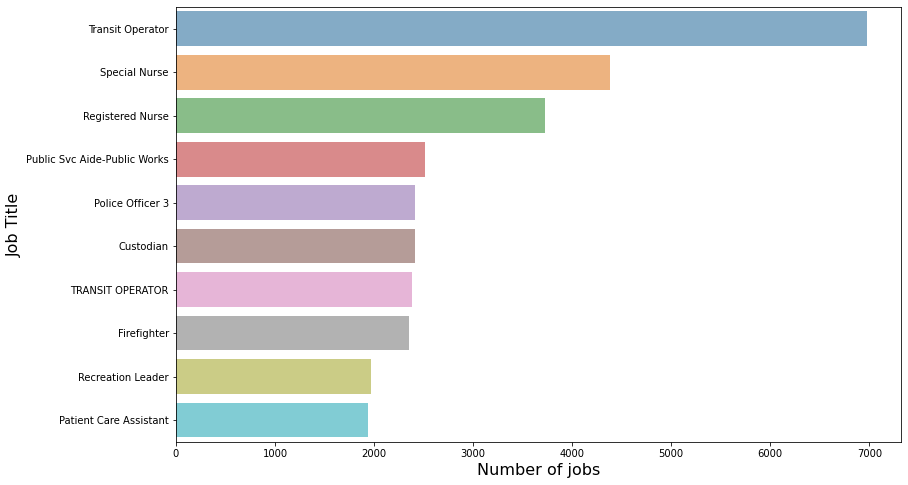

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#top 10 jobs by number
plt.figure(figsize=(13,8))
sectors = df['JobTitle'].value_counts()[0:10]
sns.barplot (y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Number of jobs', fontsize = 16)
plt.ylabel('Job Title', fontsize = 16)
plt.show()

This graph shows the top ten most common jobs in the data set.

In [ ]:
topfivetitlelist = list(df['JobTitle'].value_counts()[0:5].index.values)

In [ ]:
top5mostcommonjobtitles = df[df['JobTitle'].isin(topfivetitlelist)]
top5mostcommonjobtitles

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36314,36315,Eric Neff,Police Officer 3,109118.22,27043.59,109131.14,32140.44,245292.95,277433.39,2012,NaN,San Francisco,NaN
36317,36318,Timothy Gibson,Police Officer 3,95449.67,5481.28,148736.75,27377.58,249667.70,277045.28,2012,NaN,San Francisco,NaN
36349,36350,Constantine Zachos,Police Officer 3,102265.48,8524.03,112000.30,47492.33,222789.81,270282.14,2012,NaN,San Francisco,NaN
36478,36479,David Kucia,Police Officer 3,99304.33,18181.32,111506.56,27819.75,228992.21,256811.96,2012,NaN,San Francisco,NaN
36527,36528,Ruby Martin,Registered Nurse,174044.89,949.50,19811.98,58670.20,194806.37,253476.57,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148610,148611,Ruby S Martin,Special Nurse,21.22,0.00,0.00,4.99,21.22,26.21,2014,NaN,San Francisco,PT
148613,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,NaN,San Francisco,PT
148615,148616,Marilou P Gan,Registered Nurse,0.00,0.00,19.27,3.97,19.27,23.24,2014,NaN,San Francisco,PT
148621,148622,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.00,15.35,15.35,2014,NaN,San Francisco,PT


In [ ]:
top5mostcommonjobtitles_2011 = top5mostcommonjobtitles.iloc[(top5mostcommonjobtitles['Year'] == 2011).values]
top5mostcommonjobtitles_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                0 non-null      int64  
 1   EmployeeName      0 non-null      object 
 2   JobTitle          0 non-null      object 
 3   BasePay           0 non-null      float64
 4   OvertimePay       0 non-null      float64
 5   OtherPay          0 non-null      float64
 6   Benefits          0 non-null      float64
 7   TotalPay          0 non-null      float64
 8   TotalPayBenefits  0 non-null      float64
 9   Year              0 non-null      int64  
 10  Notes             0 non-null      float64
 11  Agency            0 non-null      object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 0.0+ bytes


In [ ]:
top5mostcommonjobtitles_2012 = top5mostcommonjobtitles.iloc[(top5mostcommonjobtitles['Year'] == 2012).values]
top5mostcommonjobtitles_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 36314 to 72924
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                6606 non-null   int64  
 1   EmployeeName      6606 non-null   object 
 2   JobTitle          6606 non-null   object 
 3   BasePay           6606 non-null   float64
 4   OvertimePay       6606 non-null   float64
 5   OtherPay          6606 non-null   float64
 6   Benefits          6606 non-null   float64
 7   TotalPay          6606 non-null   float64
 8   TotalPayBenefits  6606 non-null   float64
 9   Year              6606 non-null   int64  
 10  Notes             0 non-null      float64
 11  Agency            6606 non-null   object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 722.5+ KB


In [ ]:
top5mostcommonjobtitles_2013 = top5mostcommonjobtitles.iloc[(top5mostcommonjobtitles['Year'] == 2013).values]
top5mostcommonjobtitles_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6511 entries, 73161 to 110513
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                6511 non-null   int64  
 1   EmployeeName      6511 non-null   object 
 2   JobTitle          6511 non-null   object 
 3   BasePay           6511 non-null   float64
 4   OvertimePay       6511 non-null   float64
 5   OtherPay          6511 non-null   float64
 6   Benefits          6511 non-null   float64
 7   TotalPay          6511 non-null   float64
 8   TotalPayBenefits  6511 non-null   float64
 9   Year              6511 non-null   int64  
 10  Notes             0 non-null      float64
 11  Agency            6511 non-null   object 
 12  Status            0 non-null      object 
dtypes: float64(7), int64(2), object(4)
memory usage: 712.1+ KB


In [ ]:
top5mostcommonjobtitles_2014 = top5mostcommonjobtitles.iloc[(top5mostcommonjobtitles['Year'] == 2014).values]
top5mostcommonjobtitles_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 110617 to 148625
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                6890 non-null   int64  
 1   EmployeeName      6890 non-null   object 
 2   JobTitle          6890 non-null   object 
 3   BasePay           6890 non-null   float64
 4   OvertimePay       6890 non-null   float64
 5   OtherPay          6890 non-null   float64
 6   Benefits          6890 non-null   float64
 7   TotalPay          6890 non-null   float64
 8   TotalPayBenefits  6890 non-null   float64
 9   Year              6890 non-null   int64  
 10  Notes             0 non-null      float64
 11  Agency            6890 non-null   object 
 12  Status            6890 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 753.6+ KB


In [ ]:
stats.ttest_ind(top5mostcommonjobtitles_2012['TotalPay'],top5mostcommonjobtitles_2013['TotalPay'])

Ttest_indResult(statistic=-3.3611868322096026, pvalue=0.0007782990707349887)

In [ ]:
stats.ttest_ind(top5mostcommonjobtitles_2013['TotalPay'],top5mostcommonjobtitles_2014['TotalPay'])

Ttest_indResult(statistic=5.137402086433636, pvalue=2.82475577267574e-07)

In [ ]:
stats.ttest_ind(top5mostcommonjobtitles_2012['TotalPay'],top5mostcommonjobtitles_2014['TotalPay'])

Ttest_indResult(statistic=1.8789540524138946, pvalue=0.0602723037973523)

In [ ]:
top5mostcommonjobtitles_2012['TotalPay'].mean()

68569.42554647273

In [ ]:
top5mostcommonjobtitles_2013['TotalPay'].mean()

71593.31013822755

In [ ]:
top5mostcommonjobtitles_2014['TotalPay'].mean()

66906.14685050717

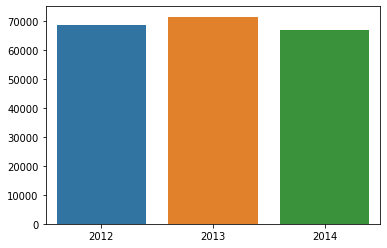

In [ ]:
sns.barplot(y=[top5mostcommonjobtitles_2012['TotalPay'].mean(),
               top5mostcommonjobtitles_2013['TotalPay'].mean(),
               top5mostcommonjobtitles_2014['TotalPay'].mean()],
            x=[2012,2013,2014])

plt.show()

This graph shows the mean of total pay for top 5 most common job titles in the data set. The mean total pay is the highest in 2013. From 2012 to 2014, there is a slight decrease.

**Conclusion**: All total pay for the top 5 most popular jobs have increased but not by a lot. The number increase from 2012 to 2013 but decrease from 2013 to 2014. Moreover, comparing 2012 to 2014 the value did not change much and the p value is greater than 0.05 hence there is no enough evidence to reject the null hyphothesis.

**Final recommendation**: In San Francisco, overall people's salary increase overtime, however it was not driven by the top five most common job in San Francisco. For company hiring manager trying to figure out the pay scale within the company, they should be expecting an increase of salary across the board but not  for certain occupation such as nurse and public service workers such as transit operator or police.